In [80]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
session = tf.Session()

## se importa el dataset de birthweight 1989 (desde el repositoria GitHub del curso, es una archivo .dat)

In [81]:
import requests
url = "https://raw.githubusercontent.com/joanby/tensorflow/master/datasets/birthweight.dat"
birth_file = requests.get(url) 
birth_data = birth_file.text.split("\r\n") ##separa cada fila del dataset

In [82]:
birth_data

['LOW\tAGE\tLWT\tRACE\tSMOKE\tPTL\tHT\tUI\tBWT',
 '1\t28\t113\t1\t1\t1\t0\t1\t709',
 '1\t29\t130\t0\t0\t0\t0\t1\t1021',
 '1\t34\t187\t1\t1\t0\t1\t0\t1135',
 '1\t25\t105\t1\t0\t1\t1\t0\t1330',
 '1\t25\t85\t1\t0\t0\t0\t1\t1474',
 '1\t27\t150\t1\t0\t0\t0\t0\t1588',
 '1\t23\t97\t1\t0\t0\t0\t1\t1588',
 '1\t24\t128\t1\t0\t1\t0\t0\t1701',
 '1\t24\t132\t1\t0\t0\t1\t0\t1729',
 '1\t21\t165\t0\t1\t0\t1\t0\t1790',
 '1\t32\t105\t1\t1\t0\t0\t0\t1818',
 '1\t19\t91\t0\t1\t1\t0\t1\t1885',
 '1\t25\t115\t1\t0\t0\t0\t0\t1893',
 '1\t16\t130\t1\t0\t0\t0\t0\t1899',
 '1\t25\t92\t0\t1\t0\t0\t0\t1928',
 '1\t20\t150\t0\t1\t0\t0\t0\t1928',
 '1\t21\t190\t1\t0\t0\t0\t1\t1928',
 '1\t24\t155\t0\t1\t1\t0\t0\t1936',
 '1\t21\t103\t1\t0\t0\t0\t0\t1970',
 '1\t20\t125\t1\t0\t0\t0\t1\t2055',
 '1\t25\t89\t1\t0\t1\t0\t0\t2055',
 '1\t19\t102\t0\t0\t0\t0\t0\t2082',
 '1\t19\t112\t0\t1\t0\t0\t1\t2084',
 '1\t26\t117\t0\t1\t1\t0\t1\t2084',
 '1\t24\t138\t0\t0\t0\t0\t0\t2100',
 '1\t17\t130\t1\t1\t1\t0\t1\t2125',
 '1\t20\t120\t1\t1\t0

In [83]:
birth_header = birth_data[0].split("\t") ##cabecera del dataset
birth_header

['LOW', 'AGE', 'LWT', 'RACE', 'SMOKE', 'PTL', 'HT', 'UI', 'BWT']

In [84]:
birth_data = [[float(x) for x in y.split("\t") if len(x)>=1] for y in birth_data[1:] if len(y)>=1] ##con esta linea se obtiene los datos limpios fila por fila
birth_data

[[1.0, 28.0, 113.0, 1.0, 1.0, 1.0, 0.0, 1.0, 709.0],
 [1.0, 29.0, 130.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1021.0],
 [1.0, 34.0, 187.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1135.0],
 [1.0, 25.0, 105.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1330.0],
 [1.0, 25.0, 85.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1474.0],
 [1.0, 27.0, 150.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1588.0],
 [1.0, 23.0, 97.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1588.0],
 [1.0, 24.0, 128.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1701.0],
 [1.0, 24.0, 132.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1729.0],
 [1.0, 21.0, 165.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1790.0],
 [1.0, 32.0, 105.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1818.0],
 [1.0, 19.0, 91.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1885.0],
 [1.0, 25.0, 115.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1893.0],
 [1.0, 16.0, 130.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1899.0],
 [1.0, 25.0, 92.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1928.0],
 [1.0, 20.0, 150.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1928.0],
 [1.0, 21.0, 190.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1928.0],
 [1.0, 24.0, 155.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1936.0],
 [1.0, 21.0, 103.0, 1.0, 0.0, 0.0

In [85]:
len(birth_data)

189

In [86]:
x_vals = np.array([x[1:8] for x in birth_data])
y_vals = np.array([x[0] for x in birth_data])

## se define la semilla de aleatoriedad

In [87]:
seed = 2019
tf.set_random_seed(seed)
np.random.seed(seed)
batch_size = 80

## se separan los datos en conjunto de entrenamiento y test

In [88]:
train_index = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_index = np.array(list(set(range(len(x_vals)))-set(train_index)))
x_vals_train = x_vals[train_index]
y_vals_train = y_vals[train_index]
x_vals_test = x_vals[test_index]
y_vals_test = y_vals[test_index]

## normalizacion de los datos

In [89]:
def normalize_cols(m, col_min = np.array([None]), col_max=np.array([None])):
    if not col_min[0]:
        col_min = m.min(axis=0)
    if not col_max[0]:
        col_max = m.max(axis=0)
    return (m-col_min)/(col_max-col_min), col_min, col_max

In [90]:
x_vals_train, train_min, train_max = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test,_,_ = np.nan_to_num(normalize_cols(x_vals_test, train_min, train_max))

## se definene los placeholders

In [91]:
x_data = tf.placeholder(shape=[None, 7], dtype= tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype= tf.float32)

## funcion para definir Variables (se hace asi para no andar escribiendo lo mismo todo el tiempo)

In [92]:
def init_variables(shape):
    return tf.Variable(tf.random_normal(shape=shape))

## funcion para definir la operacion y si tiene funcion de activacion o no (se hace asi para no andar escribiendo lo mismo todo el tiempo)

In [93]:
def logistic(input_layer, weights, biases, activation_sigmoide=True):
    linear_layer = tf.add(tf.matmul(input_layer, weights), biases)
    if (activation_sigmoide==True):
        return tf.nn.sigmoid(linear_layer)
    else:
        return linear_layer

### reduccion de datos(nota: se elige arbitrariamente): 

    
    -capa 1 = entrada=7 datos  ; salida=14 datos ; por lo tanto 7*14+14 = 112variables
    -capa 2 = entrada=14 datos ; salida=5 datos ; por lo tanto 14*5+5 = 75 variables
    -capa 3 = entrada=5 datos ; salida=1 datos  ; por lo tanto 5*1+1 = 6 variables
    
    
en total la red neuronal tiene que estimar 112+75+6 = 193 variables

## construccion de capas

In [94]:
# capa 1 = entrada=7 datos  ; salida=14 datos
A1 = init_variables(shape=[7,14])
b1 = init_variables(shape=[14])
logistic_layer_1 = logistic(x_data,A1,b1,activation_sigmoide=True)

# capa 2 = entrada=14 datos  ; salida=5 datos
A2 = init_variables(shape=[14,5])
b2 = init_variables(shape=[5])
logistic_layer_2 = logistic(logistic_layer_1,A2,b2,activation_sigmoide=True)

# capa 3 = entrada=5 datos  ; salida=1 dato
A3 = init_variables(shape=[5,1])
b3 = init_variables(shape=[1])
final_output = logistic(logistic_layer_2,A3,b3,activation_sigmoide=False)

## funcion de perdida

In [95]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=final_output, labels=y_target))

## optimizador

In [96]:
optimizador = tf.train.AdamOptimizer(learning_rate=0.05)
train_step = optimizador.minimize(loss)

## inicializan variables

In [97]:
init = tf.global_variables_initializer()
session.run(init)

## entrenamiento del modelo

In [98]:
prediction = tf.round(tf.nn.sigmoid(final_output))
predictions_correct = tf.cast(tf.equal(prediction, y_target), tf.float32)
accuracy = tf.reduce_mean(predictions_correct)

In [99]:
train_loss = []
test_loss = []

train_acc = []
test_acc = []

for i in range(1500):
    rand_index = np.random.choice(len(x_vals_train), size = batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    
    temp_loss_train = session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
    train_loss.append(temp_loss_train)
    
    temp_acc_train = session.run(accuracy, feed_dict={x_data:x_vals_train, y_target:np.transpose([y_vals_train])})
    train_acc.append(temp_acc_train)
    
    temp_acc_test = session.run(accuracy, feed_dict={x_data:x_vals_test, y_target:np.transpose([y_vals_test])})
    test_acc.append(temp_acc_test)
    
    if(i+1)%100==0:
        print("paso="+str(i+1)+ ", loss="+str(temp_loss_train)+ ", Acc= "+str(temp_acc_train))

paso=100, loss=0.55707866, Acc= 0.8013245
paso=200, loss=0.42529526, Acc= 0.80794704
paso=300, loss=0.59265184, Acc= 0.821192
paso=400, loss=0.31929025, Acc= 0.821192
paso=500, loss=0.31600782, Acc= 0.8344371
paso=600, loss=0.35540158, Acc= 0.8278146
paso=700, loss=0.38832563, Acc= 0.821192
paso=800, loss=0.33002263, Acc= 0.8543046
paso=900, loss=0.23584071, Acc= 0.86092716
paso=1000, loss=0.36961773, Acc= 0.8410596
paso=1100, loss=0.24036404, Acc= 0.86754966
paso=1200, loss=0.31011912, Acc= 0.86092716
paso=1300, loss=0.27326512, Acc= 0.8741722
paso=1400, loss=0.32613173, Acc= 0.86092716
paso=1500, loss=0.37541315, Acc= 0.8807947


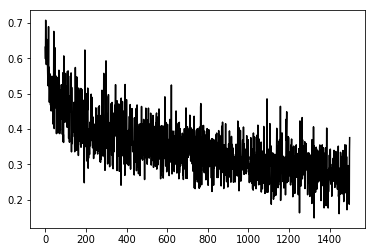

In [100]:
plt.plot(train_loss, "k-", label="perdidas en train")
plt.show()

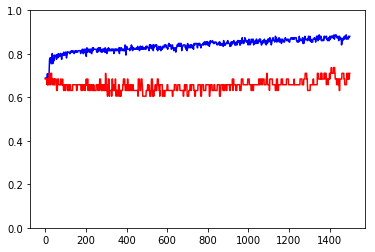

In [102]:
plt.plot(train_acc, "b-", label="train acc")
plt.plot(test_acc, "r-", label="test acc")
plt.ylim(0,1)
plt.show()

### esto es un claro ejemplo de que hay overfiting en este modelo, ya que lo red neuronal aprende muy bien los datos de entrenamiento(casi 90% de accuracy), pero predice muy por debajo del 90% de accuracy en el conjunto de test. 
#### La solucion seria probar con mas numero de capas, con otro tamaño de batch_size, con otras tecnicas de normalizacion, etc...